In [70]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [71]:
dataframe = pd.read_csv('housing_data.csv')
dataframe.drop('Unnamed: 0', axis=1, inplace=True)

In [72]:
dataframe.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,SC60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,No,No,No,0,Feb,2008,WD,Normal,208500
1,SC20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,No,No,No,0,May,2007,WD,Normal,181500
2,SC60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,No,No,No,0,Sep,2008,WD,Normal,223500
3,SC70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,No,No,No,0,Feb,2006,WD,Abnorml,140000
4,SC60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,No,No,No,0,Dec,2008,WD,Normal,250000


In [73]:
dataframe.shape

(1460, 80)

In [74]:
#LOOK FOR ALL NUMERICAL COLUMNS
numeric_cols = list(dataframe._get_numeric_data().columns)


In [75]:
numeric_cols

['LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'YrSold',
 'SalePrice']

In [76]:
categorical_cols = list(set(dataframe.columns) - set(list(dataframe._get_numeric_data().columns)))

In [77]:
categorical_cols

['ExterCond',
 'LandSlope',
 'GarageType',
 'SaleType',
 'FireplaceQu',
 'Alley',
 'Utilities',
 'Condition2',
 'BldgType',
 'MoSold',
 'BsmtFinType2',
 'GarageFinish',
 'LotShape',
 'PavedDrive',
 'HouseStyle',
 'SaleCondition',
 'Condition1',
 'Electrical',
 'Fence',
 'LotConfig',
 'HeatingQC',
 'PoolQC',
 'BsmtQual',
 'BsmtExposure',
 'Functional',
 'MSSubClass',
 'MiscFeature',
 'RoofMatl',
 'GarageQual',
 'KitchenQual',
 'Foundation',
 'MasVnrType',
 'BsmtFinType1',
 'LandContour',
 'Street',
 'Exterior2nd',
 'CentralAir',
 'BsmtCond',
 'ExterQual',
 'Neighborhood',
 'RoofStyle',
 'MSZoning',
 'GarageCond',
 'Heating',
 'Exterior1st']

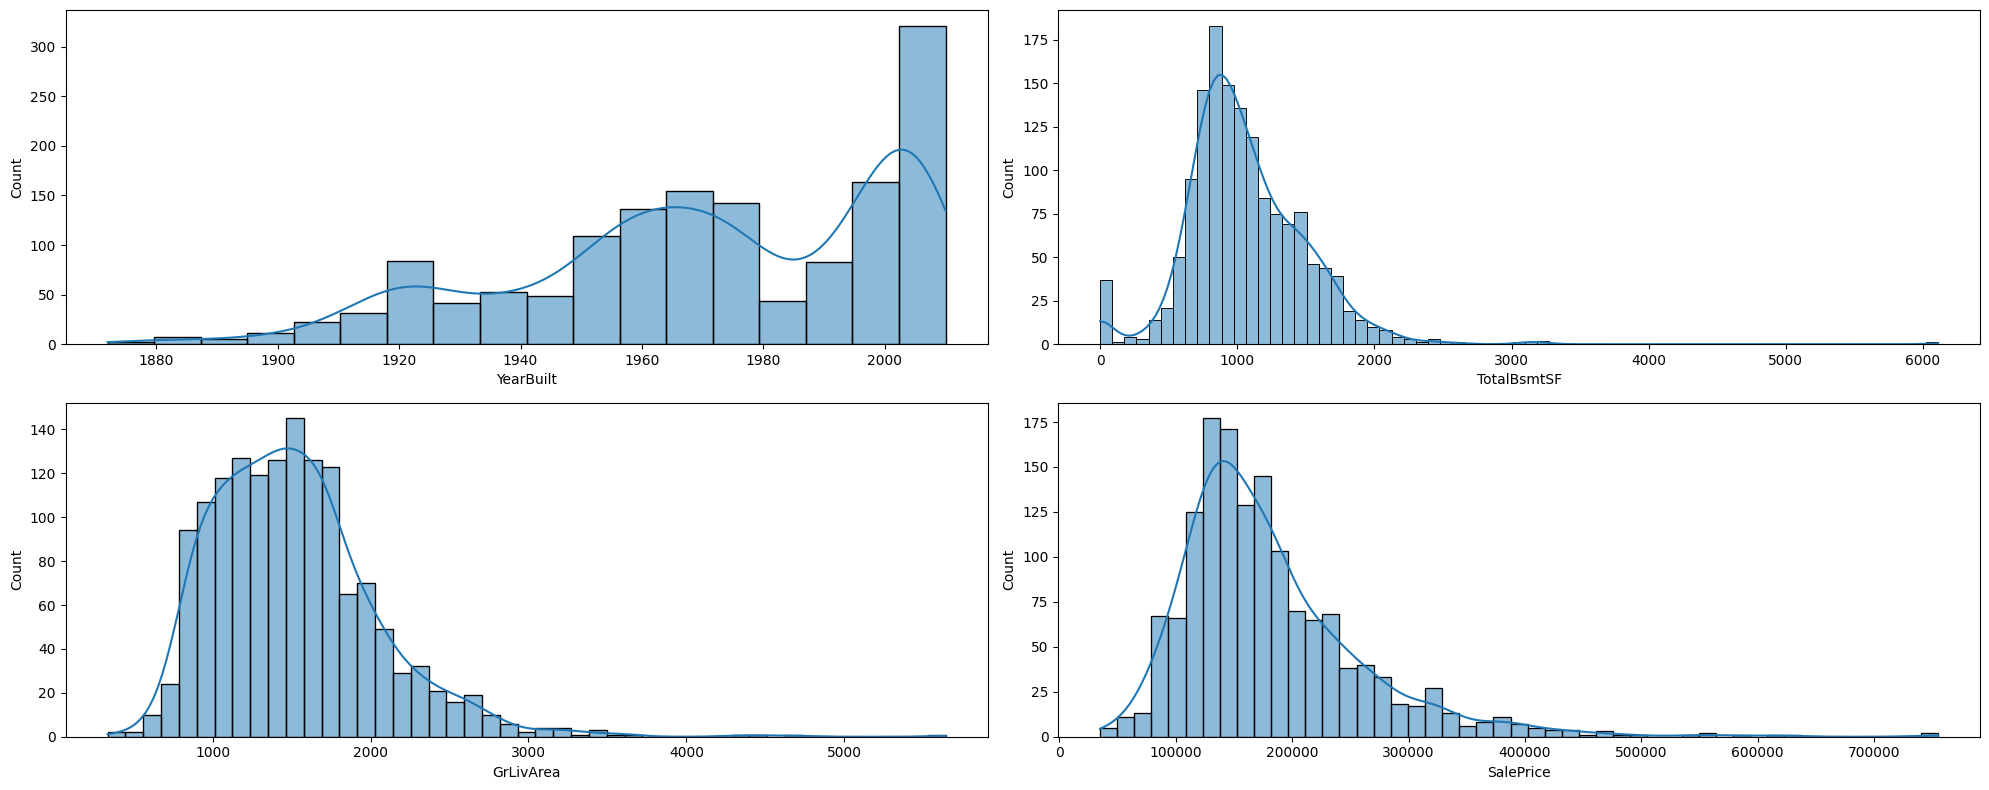

In [78]:
import seaborn as sns
from math import ceil
num_cols = ['YearBuilt', 'TotalBsmtSF', 'GrLivArea', 'SalePrice', ]
col_len = len(num_cols)
plt.figure(figsize=(20,col_len*2))
for i, c in enumerate(num_cols):
    nrows = ceil(col_len/2)
    plt.subplot(nrows, 2, i+ 1)
    sns.histplot(dataframe[c], kde=True)
plt.tight_layout()
plt.show()




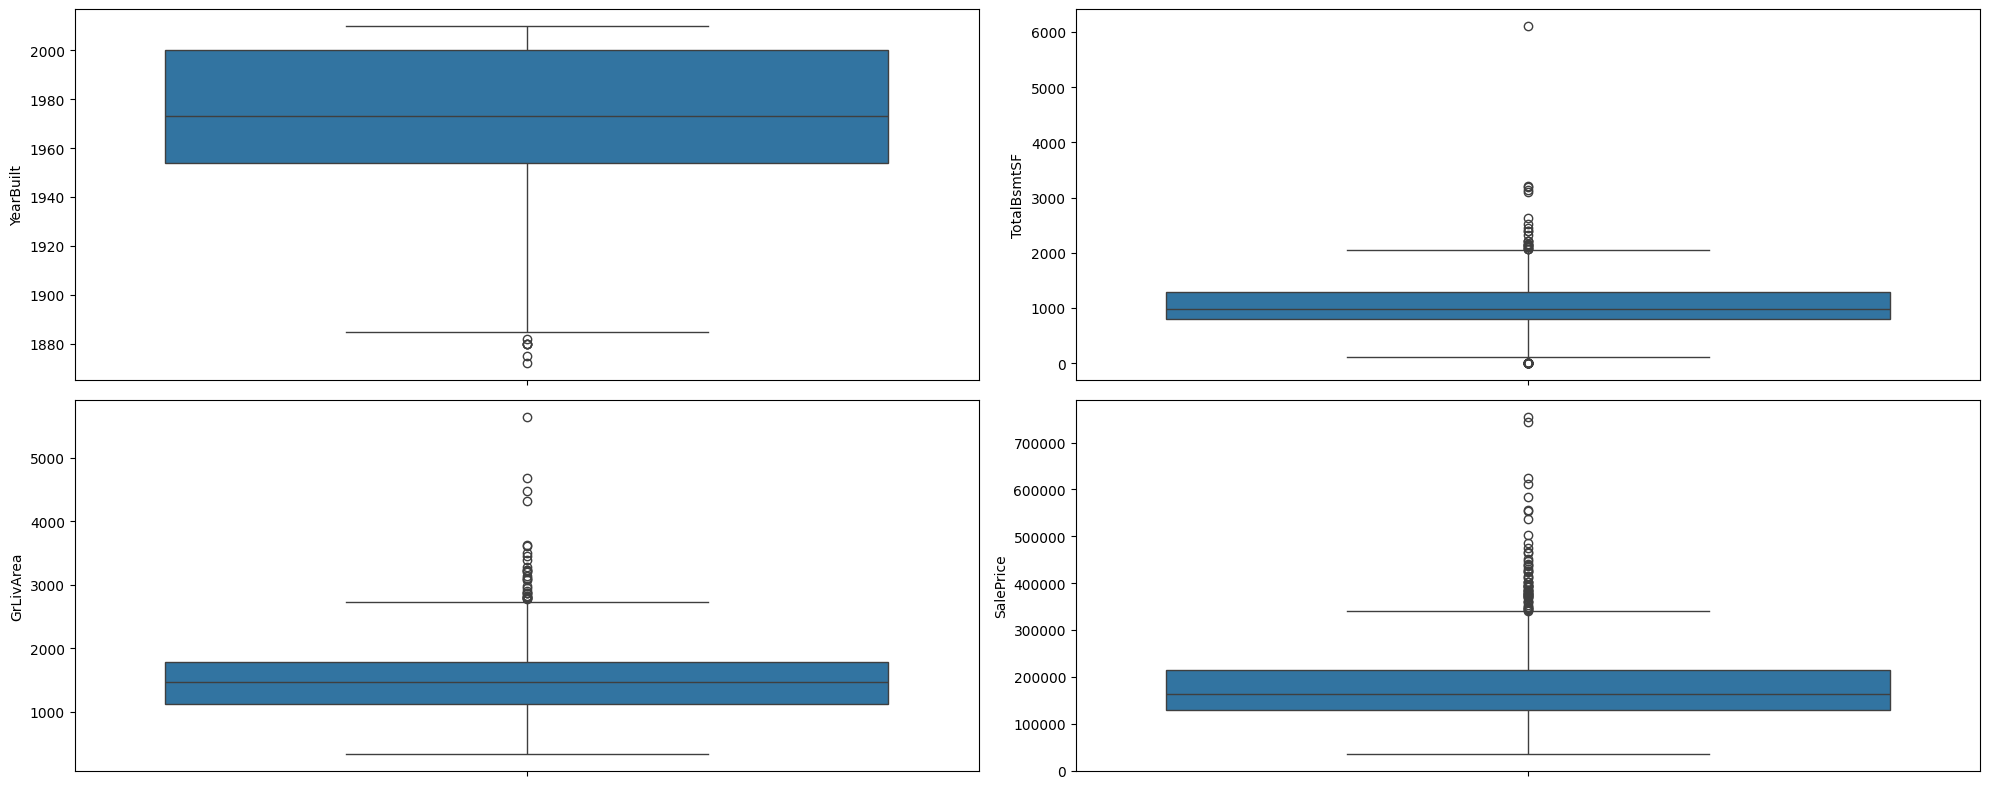

In [79]:
import seaborn as sns
from math import ceil
num_cols = ['YearBuilt', 'TotalBsmtSF', 'GrLivArea', 'SalePrice', ]
col_len = len(num_cols)
plt.figure(figsize=(20,col_len*2))
for i, c in enumerate(num_cols):
    nrows = ceil(col_len/2)
    plt.subplot(nrows, 2, i+ 1)
    sns.boxplot(dataframe[c])
plt.tight_layout()
plt.show()


In [80]:
test_array = (dataframe['YearBuilt']).values.tolist()

In [81]:
test_array[:5]

[2003, 1976, 2001, 1915, 2000]

#### The Box in box plot include value between q1 and q3, The whiskers extends to 1.5 +/- times that of q3 and q1 respectively, or the maxisum or minimum value, Beyond that are the posiible outliers 


In [82]:
## tHE Box in box plot include value between q1 and q3
q1, q3 = np.percentile(test_array, (25, 75)).tolist()
q1, q3

(1954.0, 2000.0)

In [83]:
iqr = q3-q1

In [84]:
# The whiskers extends to 1.5 +/- times that of q3 and q1 respectively, or the maxisum or minimum value, Beyond that are the posiible outliers 
max(q1 - 1.5*iqr, min(test_array)), min(q3 + 1.5*iqr, max(test_array))

(1885.0, 2010)

### Categorical

<Axes: xlabel='count', ylabel='Neighborhood'>

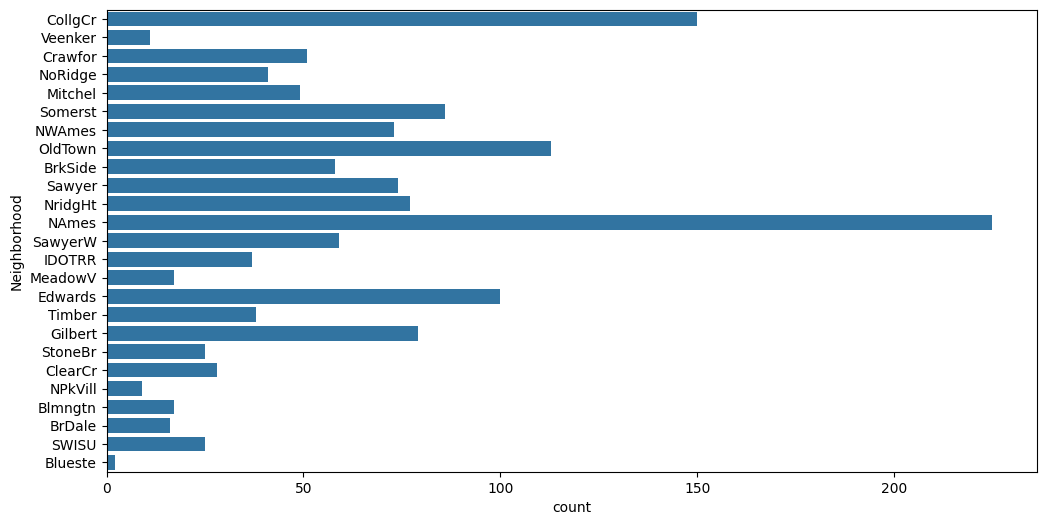

In [85]:
plt.figure(figsize=(12,6))
sns.countplot(dataframe, y= 'Neighborhood' )

<Axes: xlabel='SalePrice', ylabel='YearBuilt'>

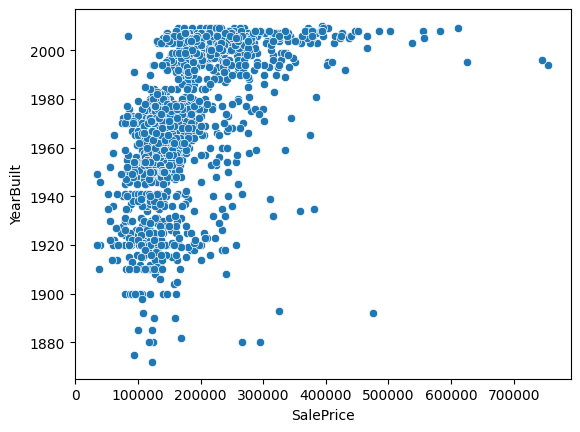

In [86]:
sns.scatterplot(dataframe, x = 'SalePrice', y = 'YearBuilt')

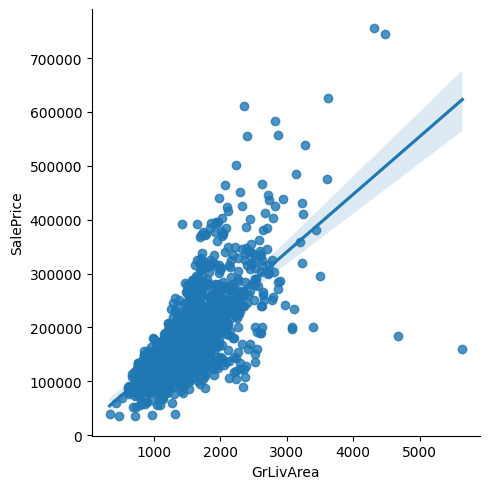

In [87]:
sns.lmplot(data=dataframe, x='GrLivArea', y='SalePrice', fit_reg=True)

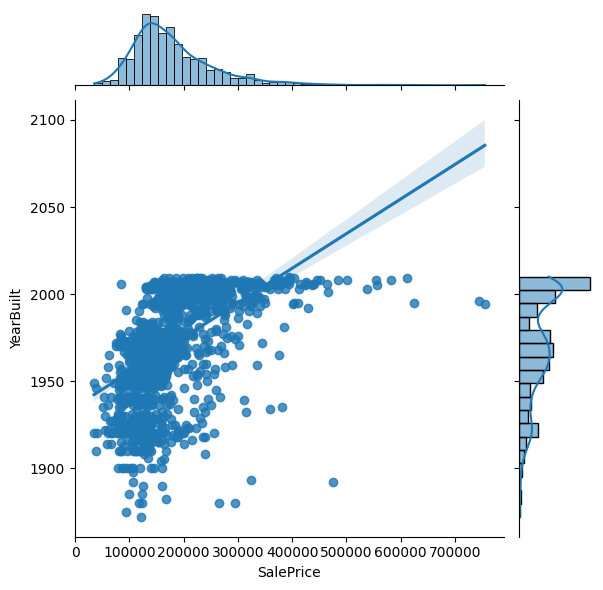

In [88]:
sns.jointplot(data=dataframe, x='SalePrice', y='YearBuilt', kind='reg')

In [89]:
data_corr = dataframe[numeric_cols].corr()

<Axes: >

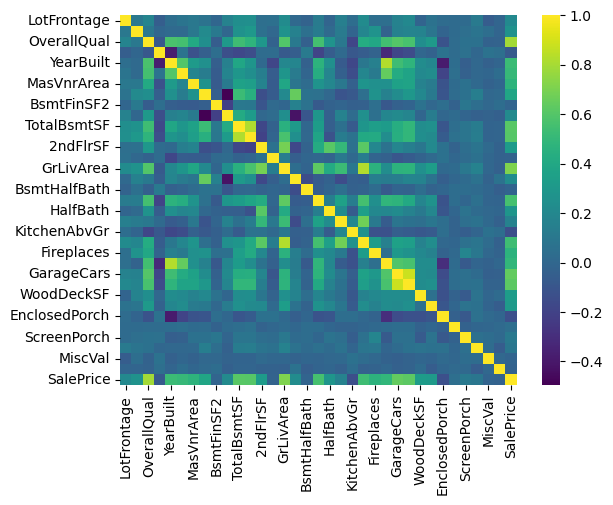

In [91]:
sns.heatmap(data_corr, cmap='viridis')

In [95]:
data_corr_10 = data_corr.nlargest(5, 'SalePrice')['SalePrice']

In [98]:
data_corr_10.index

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea'], dtype='object')

<Axes: >

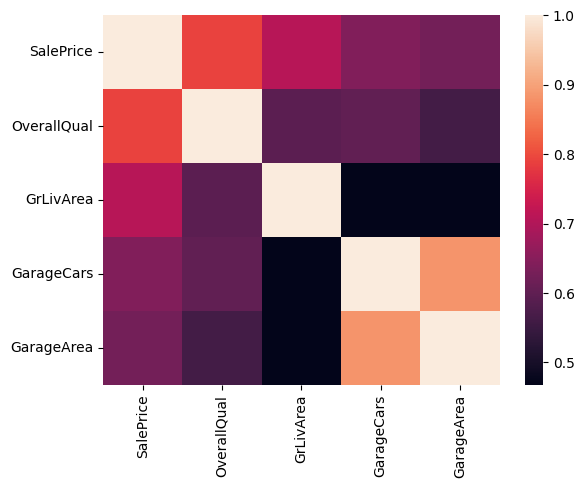

In [99]:
sns.heatmap(dataframe[data_corr_10.index].corr())

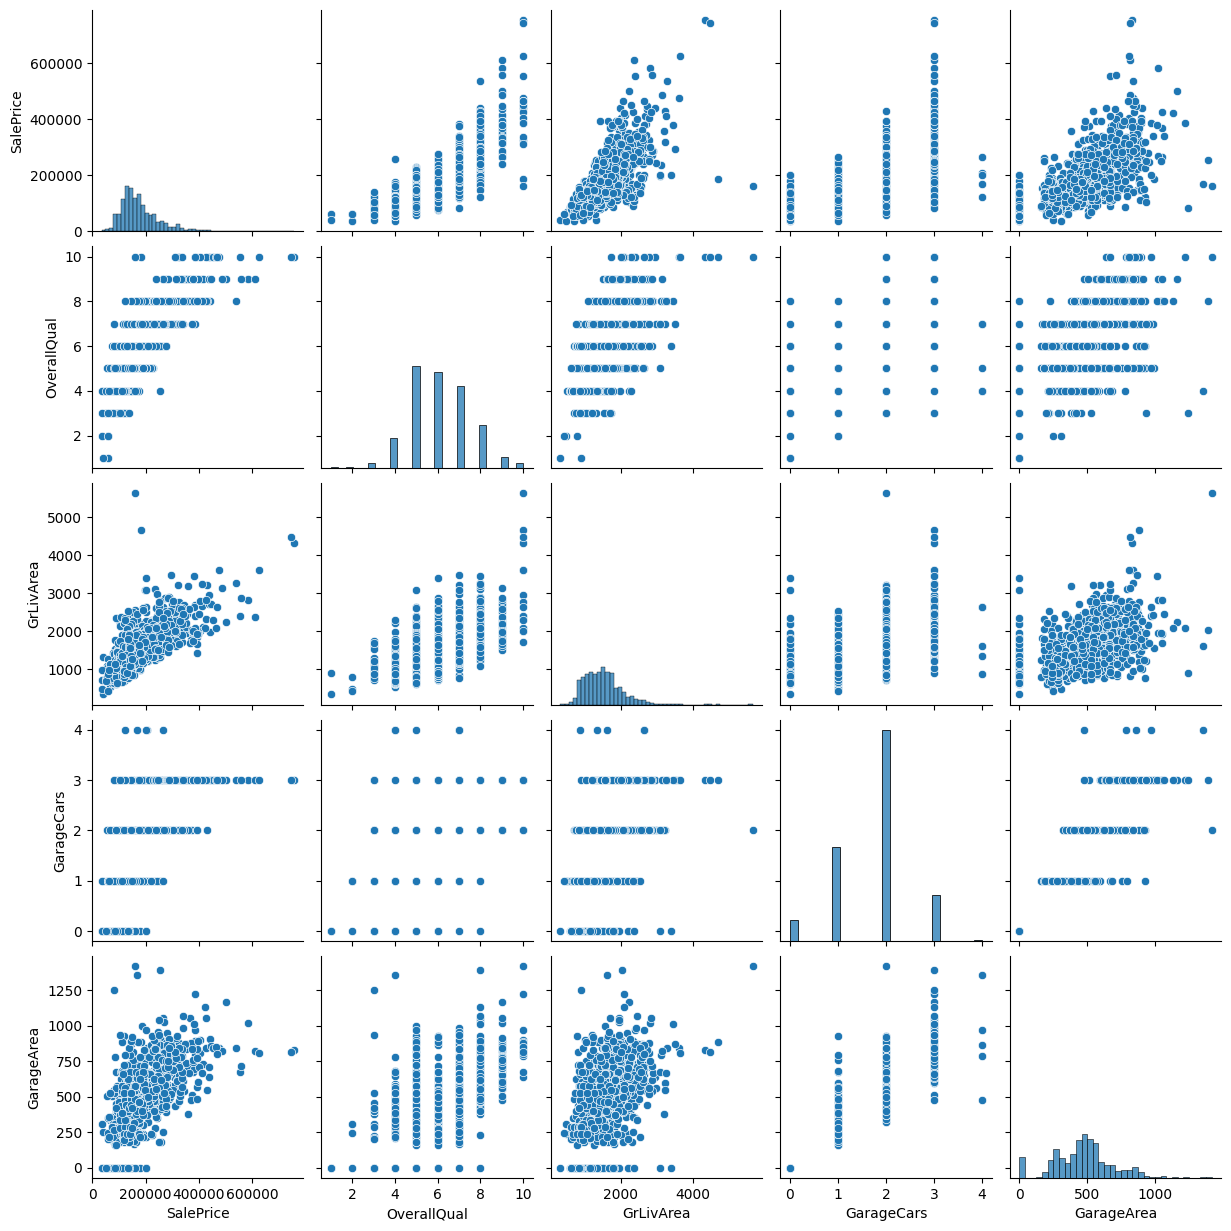

In [103]:
sns.pairplot(dataframe[data_corr_10.index])

<Axes: xlabel='Neighborhood', ylabel='SalePrice'>

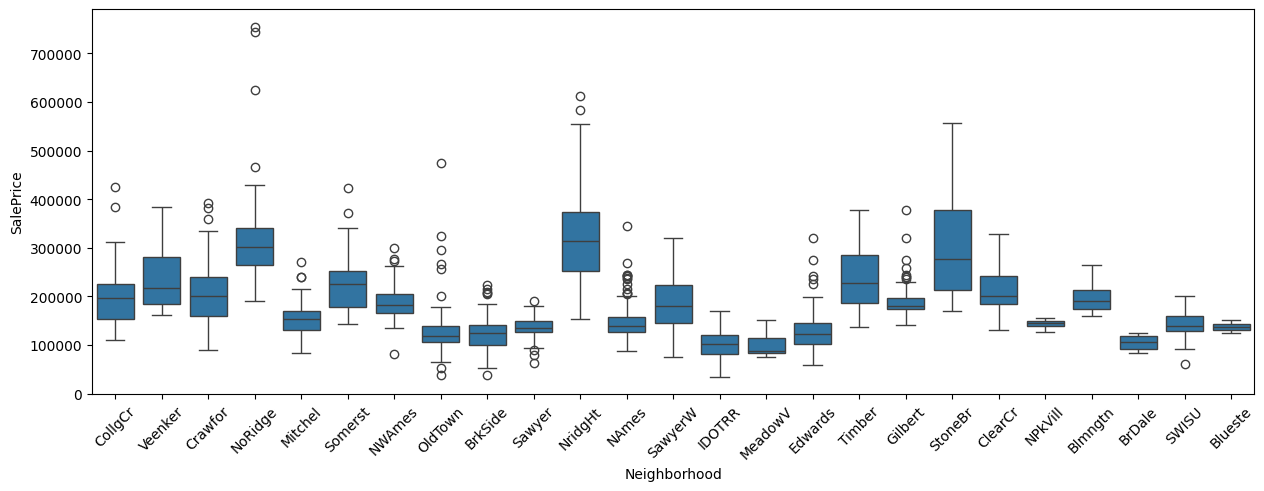

In [114]:

plt.figure(figsize=(15,5))
plt.xticks(rotation = 45)
sns.boxplot(dataframe, x = 'Neighborhood', y = 'SalePrice')

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

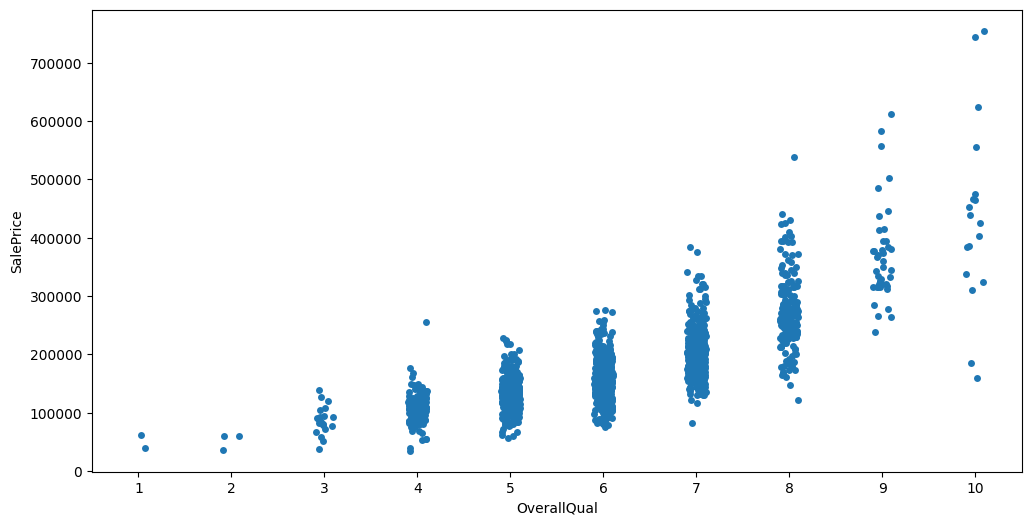

In [119]:
plt.figure(figsize=(12,6))
sns.stripplot(dataframe, x = 'OverallQual', y = 'SalePrice',)
# sns.swarmplot(dataframe, x = 'OverallQual', y = 'SalePrice', )

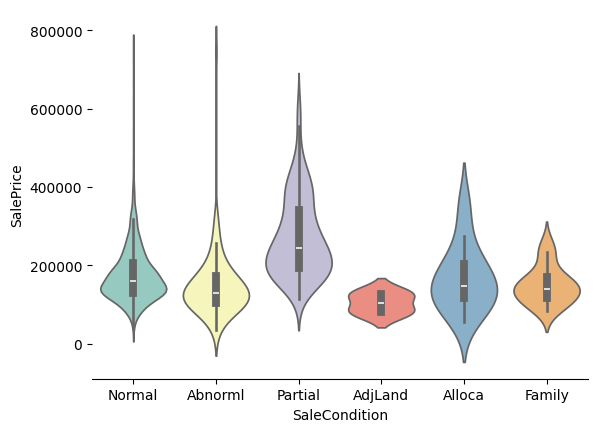

In [128]:
sns.violinplot(dataframe, x = 'SaleCondition', y = 'SalePrice', palette="Set3", hue='SaleCondition')

sns.despine(left=True)

In [130]:
import plotly.express as px
import pandas as pd
food_data = pd.DataFrame(dict(
    item_rating=[1, 5, 2, 4, 5],
    criteria=['Packaging Cost','Food Quality','Ingredients Cost',
           'Market Demand', 'Customer Rating']))

food_data.head()

,item_rating,criteria
0,1,Packaging Cost
1,5,Food Quality
2,2,Ingredients Cost
3,4,Market Demand
4,5,Customer Rating


In [134]:
fig = px.line_polar(food_data, r='item_rating', theta='criteria', line_close=True)
fig.update_traces(fill='toself')
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [136]:
px.__version__

AttributeError: module 'plotly.express' has no attribute '__version__'